[Indice](index.ipynb) | Previo: [Fundamentos.Conicas.Algebra](04.02.02.00.Fundamentos.Conicas.Algebra.ipynb) | Siguiente: [Fundamentos.Conicas.Rotaciones](04.02.04.00.Fundamentos.Conicas.Rotaciones.ipynb)

### 4.2.13. Cónicas en coordenadas cilíndricas
<a id='conicas_cilindricas'></a>

Nos proponemos ahora a escribir la ecuación de la cónica, en coordenadas cilíndricas con origen en uno de los focos.  La ecuación resultante y los resultados geométricos que se derivan de ella, es de primera importancia para la mecánica celeste.

<a id='fig:conica_foco'></a>![Derivación de la ecuación de la cónica en coordenadas cilíndricas referidas al Foco.  En la figura el ángulo $f$ es la *anomalía verdadera*.++ht!++0.5++\label{fig:conica_foco}](./figures/horizontal_conica_foco.png)

<center><b>Figura 4.23</b>. Derivación de la ecuación de la cónica en coordenadas cilíndricas referidas al Foco.  En la figura el ángulo $f$ es la *anomalía verdadera*.</center>

Comenzando con la ecuación de la cónica referida a la directriz (Ec. [ecuacion_directriz](#mjx-eqn-eq%3Aecuacion_directriz)) podemos aplicar una traslación al foco haciendo $x_d=x_f+F$ y $y_d=y_f$:

\begin{equation}
\label{eq:ecuacion_foco}
y_f^2-(e^2-1)(x_f+F)^2-2F(x_f+F)+F^2=0
\end{equation}

Si escribribimos $x_f,y_f$ en coordenadas cilíndricas como (ver Ecs. [cilindricas_a_cartesianas](#mjx-eqn-eq%3Acilindricas_a_cartesianas)):

\begin{equation}
\label{eq:conica_parametricas_f}
\begin{array}{rcl}
x_f & = & -r \cos f\\
y_f & = & r \sin f\\
\end{array}
\end{equation}
donde $f$, en lugar de la coordenada cilíndrica acimutal convencional $\theta$ (que es un ángulo referido al semi eje $x+$) el ángulo entre la dirección del periapsis y el radio vector del punto (ver Figura ([conica_foco_cilindiricas](#fig:conica_foco_cilindiricas))), la Ec. ([ecuacion_foco](#mjx-eqn-eq%3Aecuacion_foco)), después de algunas manipulaciones algebraicas se convierte en:

\begin{equation}
\label{eq:conica_ecuacion_cilindricas}
r = \frac{p}{1+e\cos f}
\end{equation}
que es la ecuación fundamental de la cónica y que veremos aparecer con mucha frecuencia en la mecánica celeste.

Las ecuaciones ([conica_parametricas](#mjx-eqn-eq%3Aconica_parametricas)) y ([conica_ecuacion_cilindricas](#mjx-eqn-eq%3Aconica_ecuacion_cilindricas)) evidencian un hecho interesante: el ángulo $f$ se puede usar para describir matemáticamente, usando un sólo parámetro, las coordenadas cartesianas de los puntos sobre la cónica.  Esto hace mucho más sencillo encontrar la posición de los puntos sobre estas curvas, en comparación como lo teníamos que hacer al usar las ecuaciones algebraicas en $x,y$ de las secciones anteriores.

Para ilustrar el poder de este resultado considere el siguiente algoritmo para graficar una elipse y compárelo con el visto en la [Sección *Un ejercicio numérico*](Not Found#conica_ejercicio_numerico):

In [2]:
%matplotlib nbagg

<a id='code:conica_dibujo'></a>

<IPython.core.display.Javascript object>


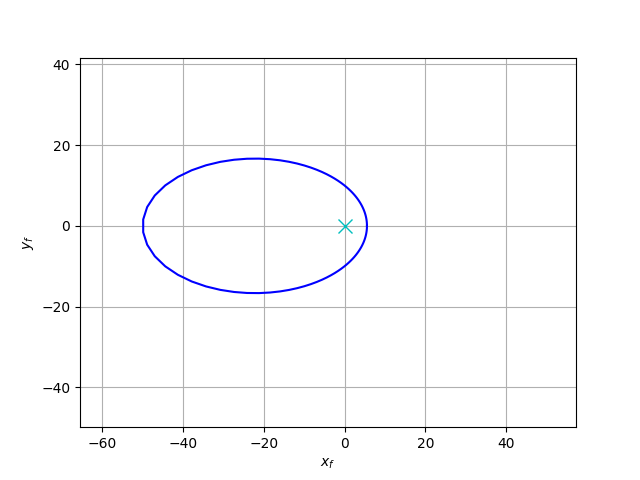

In [3]:
#Parámetros
p=10.0
e=0.8

#Valores del ángulo
from numpy import linspace,pi
fs=linspace(0,2*pi,100)

#Distancias 
from numpy import cos
rs=p/(1+e*cos(fs))

#Coordenadas
from numpy import sin
xs=rs*cos(fs)
ys=rs*sin(fs)

#Gráfica
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Puntos cónica
ax.plot(xs,ys,'b-')
#Foco
ax.plot([0],[0],'cx',markersize=10)

#Decoración
ax.set_xlabel(f"$x_f$")
ax.set_ylabel(f"$y_f$")
from pymcel.plot import fija_ejes_proporcionales
valores=(xs,ys),
fija_ejes_proporcionales(ax,valores);
ax.grid();

<a id='code:conica_dibujo'></a><center><b>Figura 4.24.</b> </center>

Este será el método que utilizaremos en lo sucesivo para generar los puntos sobre cualquier cónica.

Un hecho interesante sobre el Alg. ([conica_dibujo](#code:conica_dibujo)) es que no se generaliza fácilmente para el caso de una parábola o una hipérbola.  La razón es que en los casos de conicas abiertas el valor del ángulo $f$ esta limitado a un intervalo diferente al de la elipse en la que $f\in[0,2\pi]$ o $f\in[-\pi,\pi)$.

En este caso si despejamos $\cos f$ de la Ec. ([conica_cilindricas_foco](#mjx-eqn-eq%3Aconica_cilindricas_foco)):

$$
\cos f=\frac{1}{e}\left(\frac{p}{r}-1\right)
$$
cuando $r\rightarrow\infty$ el ángulo $f$ adopta valores extremos dados por:

$$
\cos f\rightarrow-\frac{1}{e}
$$

Para el caso de la parábola esto implica que $f\in(-\pi,\pi)$, que es idéntico al caso de la elipse pero con el extremo inferior del intervalo abierto.  En el caso de la hipérbola:

$$
f\in\left(-\pi+\psi,\pi-\psi\right)
$$
donde $\psi=\cos^{-1}(1/e)$ es el ángulo de apertura introducido en la Ec. ([cos_psi](#mjx-eqn-eq%3Acos_psi)).

Un algoritmo más general entonces, para generar los puntos sobre una cónica se presenta en la rutina a continuación:

<a id='code:puntos_conica'></a>

In [4]:
def puntos_conica(p,e,df=0.1):

    #Compute fmin,fmax
    from numpy import pi
    if e<1:
        fmin=-pi
        fmax=pi
    elif e>1:
        from numpy import arccos
        psi=arccos(1/e)
        fmin=-pi+psi+df
        fmax=pi-psi-df
    else:
        fmin=-pi+df
        fmax=pi-df
            
    #Valores del ángulo
    from numpy import linspace,pi
    fs=linspace(fmin,fmax,500)

    #Distancias 
    from numpy import cos
    rs=p/(1+e*cos(fs))

    #Coordenadas
    from numpy import sin
    xs=rs*cos(fs)
    ys=rs*sin(fs)
    from numpy import zeros_like
    zs=zeros_like(xs)
    
    return xs,ys,zs

Y un gráfico de la cónica, usando la rutina anterior sería:

<IPython.core.display.Javascript object>


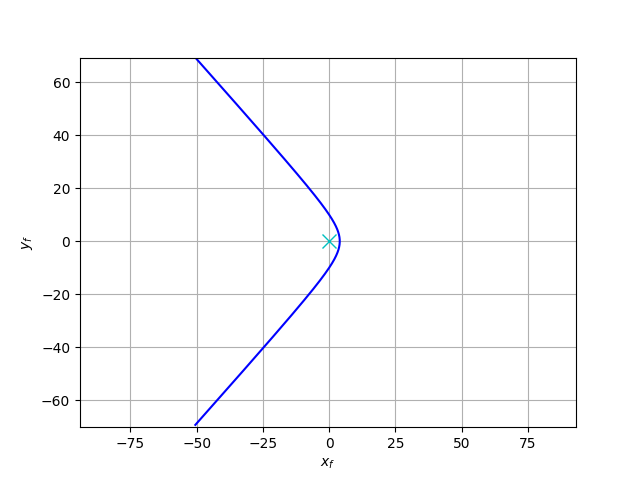

In [5]:
#Genera puntos
p=10.0
e=1.5
xs,ys,zs=puntos_conica(p,e)

#Gráfica
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

ax.plot(xs,ys,'b-')
ax.plot([0],[0],'cx',markersize=10)

#Decoración
ax.set_xlabel(f"$x_f$")
ax.set_ylabel(f"$y_f$")
from pymcel.plot import fija_ejes_proporcionales
valores=(xs,ys),
fija_ejes_proporcionales(ax,valores);
ax.grid()

<a id='fig:04.02.03.00.Fundamentos.Conicas.Anomalias_25'></a><center><b>Figura 4.25.</b> </center>

### 4.2.14. Anomalías
<a id='subsubsec_conicas_anomalias'></a>

Además de las Ecs. ([conica_ecuacion_cilindricas](#mjx-eqn-eq%3Aconica_ecuacion_cilindricas)) y ([conica_parametricas_f](#mjx-eqn-eq%3Aconica_parametricas_f)) en las que describimos las coordenadas de los puntos sobre una cónica arbitraria como función de un único parámetro $f$ (ecuaciones paramétricas), existe una segunda manera de expresar las ecuaciones de la elipse y de la hipérbola, en términos de otro parámetro.

En el caso de la elipse, por ejemplo, si partimos de la ecuación respecto al centro (Ec. [ecuacion_centro](#mjx-eqn-eq%3Aecuacion_centro)):

$$
\frac{x_c^2}{a^2}+\frac{y_c^2}{b^2}=1
$$
es posible escribir una forma parámetrica para las coordenadas:

\begin{equation}
\label{eq:conica_parametricas_E}
\begin{array}{rcl}
x_c & = & a\cos E\\
y_c & = & b\sin E\\
\end{array}
\end{equation}
donde $E$ es el nuevo parámetro.

La interpretación del parámetro $f$ en la ecuación en coordenadas cilíndricas de la cónica era clara: el valor $f$ para un punto dado, es al ángulo formado por la línea que va del foco al periapsis y la dirección del radio vector del punto.  Por ser un ángulo que específica la posición del punto respecto al foco (en el que se encuentra el Sol, en la teoría de Kepler del movimiento planetario), llamamos a $f$ la **anomalía verdadera** del punto.

> **Un poco de historia: Kepler y las anomalías.**<a id=''></a> El nombre de anomalías viene de Kepler.

¿Qué interpretación tiene por su parte el parámetro $E$ en las Ecs. ([conica_parametricas_E](#mjx-eqn-eq%3Aconica_parametricas_E))?  

En la construcción de la Figura ([anomalia_excentrica](#fig:anomalia_excentrica))) identificamos a $E$ conmo un nuevo ángulo, esta vez medido respecto al centro de la elipse y cuyo radio asociado al cortar dos círculos imaginarios de radios $a$ y $b$, permiten encontrar la abcisa y la ordenada de los puntos de la elipse, respectivamente.  

Por el hecho de medirse respecto al centro del círculo y no respecto del foco (en el que en la teoría de Kepler se encuentra el Sol, centro del Sistema Solar), llamamos a $E$ la **anomalía excéntrica**.

<a id='fig:anomalia_excentrica'></a>![Definición de la anomalía excéntrica $E$ y el método asociada a ella para determinar la posición de los puntos sobre una elipse.++ht!++0.5++\label{fig:anomalia_excentrica}](./figures/square_anomalia_excentrica.png)

<center><b>Figura 4.26</b>. Definición de la anomalía excéntrica $E$ y el método asociada a ella para determinar la posición de los puntos sobre una elipse.</center>

¿Podemos escribir una ecuación para $r$ en términos del parámetro $E$ análoga a la Ec. ([conica_ecuacion_cilindricas](#mjx-eqn-eq%3Aconica_ecuacion_cilindricas)) que nos da $r$ en función de $f$? ¡Sin duda alguna!

Considere el tríangulo entre los puntos FPQ en la Figura ([anomalia_excentrica](#fig:anomalia_excentrica)).  El teorema de pitágoras en ese triángulo se escribe:

$$
r^2=(a\cos E-ae)^2 + b^2\sin^2 E
$$

Teniendo en cuenta que $b^2=a^2(1-e^2)$ y después de un poco de ágebra obtenemos:

\begin{equation}
\label{eq:conica_anomalia_excentrica}
r=a(1-e\cos E)
\end{equation}
que será una forma para representar la cónica alternativa a la Ec. ([conica_anomalia_excentrica](#mjx-eqn-eq%3Aconica_anomalia_excentrica)) y que usaremos con frecuencia en el libro.

Finalmente, la manipulación adecuada de las ecuaciones anteriores permite escribir una relación explícita entre las anomalías verdadera $f$ y excéntrica $E$ que será muy utilizada a lo largo de este libro (ver problemas al final del capítulo):

\begin{equation}
\label{eq:fE}
\tan \frac{f}{2} = \sqrt{\frac{1+e}{1-e}} \tan \frac{E}{2}
\end{equation}

<IPython.core.display.Javascript object>


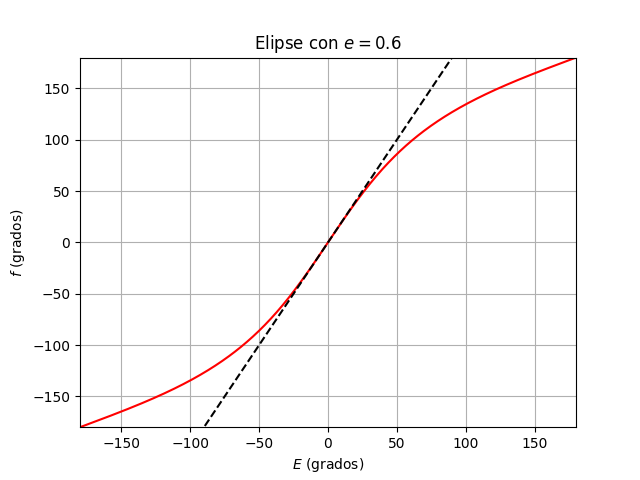

In [5]:
e=0.6

import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

from numpy import linspace,pi
Es=linspace(-pi,pi,500)

from numpy import arctan,tan,sqrt
fe=sqrt((1+e)/(1-e))
fs=2*arctan(fe*tan(Es/2))

ax.plot(Es*180/pi,fs*180/pi,'r-');

#Aproximación lineal
Els=linspace(-pi,pi,100)
ax.plot(Els*180/pi,fe*Els*180/pi,'k--');

#Decoración
ax.grid();
ax.set_xlabel("$E$ (grados)");
ax.set_ylabel("$f$ (grados)");
ax.set_title(f"Elipse con $e={e}$");
ax.set_xlim((-180,180));
ax.set_ylim((-180,180));



<a id='fig:04.02.03.00.Fundamentos.Conicas.Anomalias_27'></a><center><b>Figura 4.27.</b> Anomalía verdadera $f$ como función de la anomalía excéntrica $E$ para una elipse.  La línea punteada corresponde a la aproximación $f\approx\sqrt{(1+e)/(1-e)}E$.</center>

Un procedimiento similar al anterior, pero en el caso de la hipérbola, permite escribir las coordenadas de los puntos de la curva en términos de un nuevo parámetro $F$:

\begin{equation}
\label{eq:hiperbola_parametrica_F}
\begin{array}{rcl}
x_c & = & a \cosh F\\
y_c & = & a \sinh F\\
\end{array}
\end{equation}

Por analogía con la elipse, $F$ también es llamada la anomalía excéntrica (aunque en este caso la interpretación geométrica de $F$ no es tan directa como en el caso de $E$.)

La distancia al foco se puede escribir en términos de $F$ como:

\begin{equation}
r = a(e\cosh F - 1)
\end{equation}
y la relación entre la anomalía verdadera $f$ y la anomalía excéntrica $F$ resulta ser:

\begin{equation}
\tanh \frac{f}{2} = \sqrt{\frac{e+1}{e-1}} \tanh \frac{F}{2}
\end{equation}

<IPython.core.display.Javascript object>


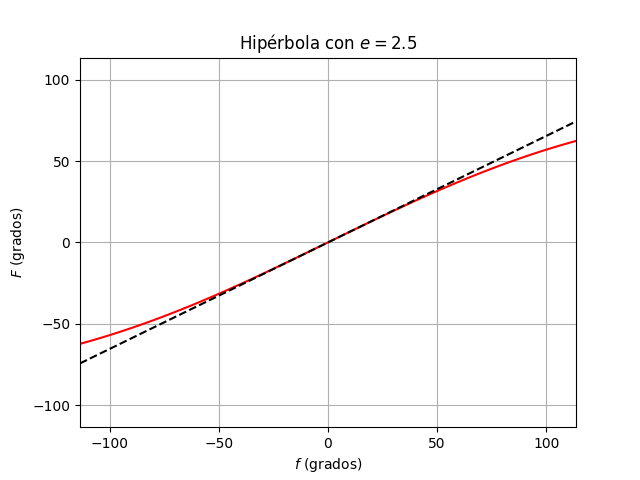

In [6]:
e=2.5

#Valor extremo de la anomalía verdadera
from numpy import arccos
psi=arccos(1/e)
fmax=pi-psi

import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Valores de la anomalía verdadera
from numpy import linspace,pi
fs=linspace(-fmax,fmax,100)

#Relación
from numpy import arctanh,tanh,sqrt
fe=sqrt((e-1)/(e+1))
Fs=2*arctanh(fe*tanh(fs/2))

#Gráfico de la relación
ax.plot(fs*180/pi,Fs*180/pi,'r-');

#Aproximación lineal
fls=linspace(-fmax,fmax,100)
ax.plot(fls*180/pi,fe*fls*180/pi,'k--');

#Decoración
ax.grid();
ax.set_xlabel("$f$ (grados)");
ax.set_ylabel("$F$ (grados)");
ax.set_title(f"Hipérbola con $e={e}$");
ax.set_xlim((-fmax*180/pi,fmax*180/pi));
ax.set_ylim((-fmax*180/pi,fmax*180/pi));



<a id='fig:04.02.03.00.Fundamentos.Conicas.Anomalias_28'></a><center><b>Figura 4.28.</b> Anomalía excéntrica $F$ como función de la anomalía verdadera $f$ para una hipérbola. La línea punteada corresponde a la aproximación $F\approx\sqrt{(e-1)/(e+1)}f$.</center>

[Indice](index.ipynb) | Previo: [Fundamentos.Conicas.Algebra](04.02.02.00.Fundamentos.Conicas.Algebra.ipynb) | Siguiente: [Fundamentos.Conicas.Rotaciones](04.02.04.00.Fundamentos.Conicas.Rotaciones.ipynb)